<a href="https://colab.research.google.com/github/scottspurlock/random_research_ideas/blob/main/distributions_and_distances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding the middle between two Gaussian distributions

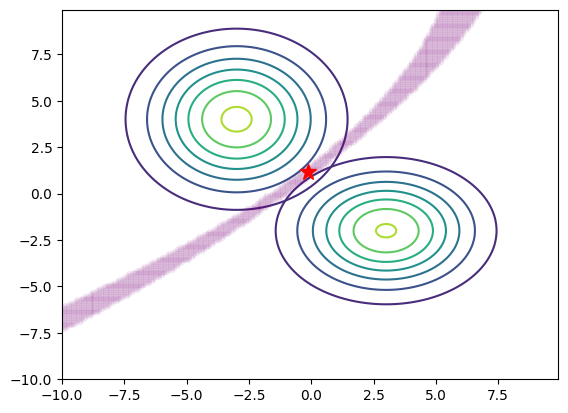

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.spatial import distance

# all the points
x, y = np.mgrid[-10:10:.1, -10:10:.1]
data = np.dstack((x, y)) # nx x ny x 2

# distribution 1
mu1 = np.array([-3, 4])
sigma1 = np.array([[5, 0],
                   [0, 6]])
distribution1 = multivariate_normal(mu1, sigma1)
z1 = distribution1.pdf(data)

# distribution 2
mu2 = np.array([3, -2])
sigma2 = np.array([[5, 0.],
                   [0, 4]])
distribution2 = multivariate_normal(mu2, sigma2)
z2 = distribution2.pdf(data)


# plt.contourf(x, y, z1)
plt.contour(x, y, z1)
plt.contour(x, y, z2)

# show points on the boundary between distributions
positions = np.vstack([x.ravel(), y.ravel()]).T # gives n x 2
for d in positions:
    # find the mahalanobis distance from the point to each mean
    dist1 = distance.mahalanobis(d, mu1, sigma1)
    dist2 = distance.mahalanobis(d, mu2, sigma2)

    # if this point in space is about equidistant from each mean
    if np.abs(dist1 - dist2) < 1 and dist2 < 40:
        plt.plot(d[0], d[1], '.', color='purple', alpha=0.05)

# find the center point iteratively
vec = mu1 - mu2
mid = mu2 + 0.5 * vec
dist1 = distance.mahalanobis(mid, mu1, sigma1)
dist2 = distance.mahalanobis(mid, mu2, sigma2)
while np.abs(dist1 - dist2) > 1e-3:
    diff = dist1 - dist2
    ratio = diff/dist1
    mid = mu2 + ratio * vec
    dist1 = distance.mahalanobis(mid, mu1, sigma1)
    dist2 = distance.mahalanobis(mid, mu2, sigma2)
plt.plot(mid[0], mid[1], '*', color='red', markersize=12)
plt.show()
